<br>
<img align="center" src="imagenes/logo.png"  width="200" height="141">
<font size=36><center> Machine Learning con Python </center> </font>
<br>

<h1 align='center'> Modulo V: Deep Learning  </h1>
<h2 align='center'>  Redes Neuronales con Keras </h2> 

---

En esta sección vamos a implementar un perceptrón multicapas usando la librería Keras y vamos a reproducir el ejemplo de clasificación de digitos manúscritos pero ahora con Keras

In [26]:
import matplotlib.pyplot as plt
import numpy as np
import math
import os
import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout,Input
from keras.optimizers import Adam
from keras.utils import to_categorical
from keras.datasets import mnist

## Importamos el dataset

In [46]:
#Directorio de trabajo
directorio = os.getcwd()

In [65]:
(x_train, y_train),(x_test,y_test) = mnist.load_data(path = directorio + '\datos\mnist.npz')

In [48]:
x_train.shape

(60000, 28, 28)

In [49]:
y_train.shape

(60000,)

### Definimos una función para trazar 9 imágenes en una cuadrícula de 3x3, y escribir las clases verdadera y predicha debajo de cada imagen.

In [50]:
def plot_images(images, cls_true, cls_pred = None):
    assert len(images) == len(cls_true) == 9

    # Creamos un objeto figure 3x3.
    fig, axes = plt.subplots(3, 3)
    fig.subplots_adjust(hspace=0.3, wspace=0.3)

    for i, ax in enumerate(axes.flat):
        # Plot imagen.
        ax.imshow(images[i], cmap='binary')

        # Muestra la clase real y la predicha.
        if cls_pred is None:
            xlabel = "True: {0}".format(cls_true[i])
        else:
            xlabel = "True: {0}, Pred: {1}".format(cls_true[i], cls_pred[i])

        # Muestra las clases y las etiquetas de los ejes.
        ax.set_xlabel(xlabel)       
        ax.set_xticks([])
        ax.set_yticks([])

    # Finalmente se grafica.
    plt.show()

### Visualizamos algunos datos de ejemplo

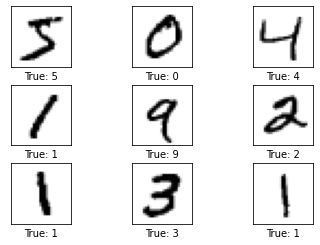

In [66]:
# Obtenemos algunas imágenes de prueba
images = x_train[0:9]

# Obtenemos la clase a la que pertenece cada imagen.
cls_true = y_train[0:9]

# Graficamos junto con la etiqueta correspondiente
plot_images(images=images, cls_true=cls_true)

### Definimos el conjunto de variables para dar formato a las dimensiones de nuestras imágenes:

### Preprocesamiento

In [52]:
x_train = x_train.reshape(x_train.shape[0], 28*28)
x_test = x_test.reshape(x_test.shape[0], 28*28)

x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255

In [53]:
# Convertimos en un vector de una dimensión
y_train = keras.utils.to_categorical(y_train,10)
y_test = keras.utils.to_categorical(y_test,10)

### Creamos el modelo

In [54]:
model = Sequential()

# Agrega una capa de entrada 
# Tenga en cuenta que la forma de entrada debe ser una tupla que contenga el tamaño de la imagen.
model.add(Input(shape = x_train.shape[1:]))

# Primera capa completamente conectada  con ReLU-activation.
model.add(Dense(128, activation='relu'))

# Última capa totalmente conectada con activación de softmax
# para usar en la clasificación.
model.add(Dense(num_classes, activation='softmax'))

### Resumen del modelo

In [55]:
model.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_4 (Dense)              (None, 128)               100480    
_________________________________________________________________
dense_5 (Dense)              (None, 10)                1290      
Total params: 101,770
Trainable params: 101,770
Non-trainable params: 0
_________________________________________________________________


### Compilación del modelo

La red neuronal ahora se ha definido y debe completarse agregando una función de coste, un optimizador y las métricas de rendimiento. Esto se llama modelo de "compilación" en Keras.

Podemos definir el optimizador y si queremos un mayor control de sus parámetros, entonces necesitamos crear una instancia de un objeto. Por ejemplo, podemos establecer la tasa de aprendizaje.

In [56]:
optimizer = Adam(lr=1e-3)

Para un problema de clasificación como el de nuestro ejemplo (MNIST) que tiene 10 clases posibles, necesitamos usar la función de pérdida llamada categórica_crossentropy. La métrica de rendimiento que nos interesa es la precisión de la clasificación.

In [57]:
model.compile(optimizer = optimizer,loss='categorical_crossentropy', metrics=['accuracy'])

### Entrenamiento

Ahora que el modelo se ha definido completamente, con su función de pérdida y su optimizador, podemos entrenarlo. Lo hacemos con la función fit. Esta función toma matrices numpy y realiza un número dado de épocas (epochs) de entrenamiento utilizando el tamaño de lote de datos dado.

Una época es un uso completo de todo el conjunto de entrenamiento. Es decir, durante 10 epochs, iteramos aleatoriamente sobre todo el conjunto de entrenamiento 10 veces.

In [58]:
# entrenamos el modelo...
historia = model.fit(x_train, y_train, validation_data=(x_test, y_test), epochs = 10, batch_size = 32,verbose=2)

Epoch 1/10
1875/1875 - 5s - loss: 0.2535 - accuracy: 0.9270 - val_loss: 0.1314 - val_accuracy: 0.9625
Epoch 2/10
1875/1875 - 6s - loss: 0.1117 - accuracy: 0.9664 - val_loss: 0.1016 - val_accuracy: 0.9703
Epoch 3/10
1875/1875 - 4s - loss: 0.0775 - accuracy: 0.9768 - val_loss: 0.0806 - val_accuracy: 0.9743
Epoch 4/10
1875/1875 - 6s - loss: 0.0582 - accuracy: 0.9821 - val_loss: 0.0830 - val_accuracy: 0.9753
Epoch 5/10
1875/1875 - 4s - loss: 0.0449 - accuracy: 0.9856 - val_loss: 0.0834 - val_accuracy: 0.9750
Epoch 6/10
1875/1875 - 4s - loss: 0.0354 - accuracy: 0.9886 - val_loss: 0.0750 - val_accuracy: 0.9776
Epoch 7/10
1875/1875 - 6s - loss: 0.0279 - accuracy: 0.9913 - val_loss: 0.0767 - val_accuracy: 0.9769
Epoch 8/10
1875/1875 - 5s - loss: 0.0224 - accuracy: 0.9930 - val_loss: 0.0750 - val_accuracy: 0.9784
Epoch 9/10
1875/1875 - 4s - loss: 0.0196 - accuracy: 0.9938 - val_loss: 0.0916 - val_accuracy: 0.9753
Epoch 10/10
1875/1875 - 4s - loss: 0.0154 - accuracy: 0.9952 - val_loss: 0.0777 - 

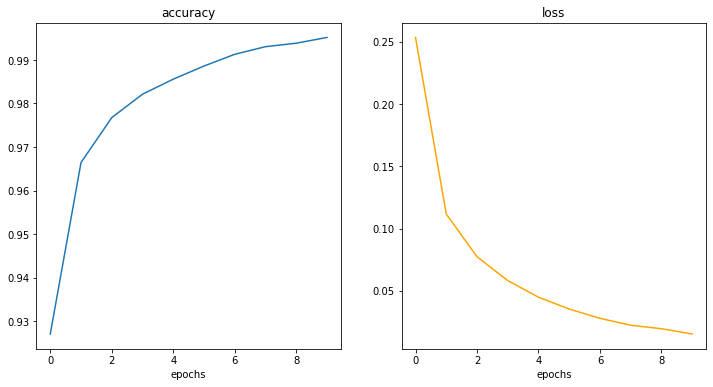

In [60]:
plt.figure(figsize=(12,6))
plt.subplot(1,2,1)
plt.plot(historia.history['accuracy'])
plt.title('accuracy')
plt.xlabel('epochs')
plt.subplot(1,2,2)
plt.plot(historia.history['loss'],color='orange')
plt.title('loss')
plt.xlabel('epochs')
plt.show()

### Predicción

In [61]:
prediccion = model.predict(x_test)

In [62]:
prediccion = np.argmax(prediccion,axis=1)

### Visualizamos los resultados

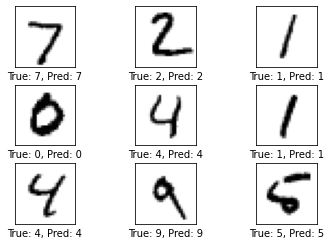

In [67]:
# Obtenemos algunas imágenes de prueba
images = x_test[0:9]

# Obtenemos la clase a la que pertenece cada imagen.
cls_true = y_test[0:9]

# Obtenemos la clase predicha por el modelo
cls_pred = prediccion[0:9]

# Graficamos junto con la etiqueta correspondiente
plot_images(images=images, cls_true=cls_true,cls_pred = cls_pred)

In [97]:
img = plt.imread('datos/tres.jpg')

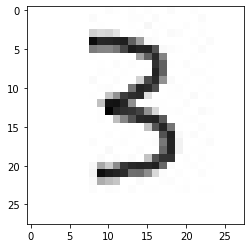

In [98]:
plt.imshow(img)

In [99]:
img = img[:,:,0]

In [100]:
img = 1-img/255

In [101]:
img = img.reshape(1,28*28)

In [102]:
valor_predicho = model.predict(img)

In [103]:
valor_predicho = np.argmax(valor_predicho)

In [104]:
print('La imagen es un ',valor_predicho)

La imagen es un  3
